In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import nltk
nltk.download('punkt', download_dir='C:\\Users\\Phong\\AppData\\Roaming\\nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd

# Correct URL format
url = "https://raw.githubusercontent.com/whosphong/AI-STARTUP-FAILURE--UAMATH509/refs/heads/main/Startup%20Failure%20(Finance%20and%20Insurance).csv"

# Read the CSV file directly from the URL
data = pd.read_csv(url)

In [4]:
data.head()

,Name,Sector,Years of Operation,What They Did,How Much They Raised (Millions),Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             47 non-null     object 
 1   Sector                           47 non-null     object 
 2   Years of Operation               47 non-null     object 
 3   What They Did                    47 non-null     object 
 4   How Much They Raised (Millions)  47 non-null     float64
 5   Why They Failed                  47 non-null     object 
 6   Takeaway                         47 non-null     object 
 7   Giants                           47 non-null     int64  
 8   No Budget                        47 non-null     int64  
 9   Competition                      47 non-null     int64  
 10  Poor Market Fit                  47 non-null     int64  
 11  Acquisition Stagnation           47 non-null     int64  
 12  Platform Dependency     

In [6]:
data['What They Did'] = data['What They Did'].astype(str)  # Ensures the column is string type
data['Why They Failed'] = data['Why They Failed'].astype(str)
data['Takeaway'] = data['Takeaway'].astype(str)

In [7]:
def calculate_years(yr_range):
    start_year, end_year = map(int, yr_range.split('-'))
    return end_year - start_year

# Apply the function to the column
data['Years of Operation'] = data['Years of Operation'].apply(calculate_years)

In [8]:
data['Sector'].unique()
data.drop(columns='Sector', inplace = True)

In [9]:
data.isnull().sum()

Name                               0
Years of Operation                 0
What They Did                      0
How Much They Raised (Millions)    0
Why They Failed                    0
Takeaway                           0
Giants                             0
No Budget                          0
Competition                        0
Poor Market Fit                    0
Acquisition Stagnation             0
Platform Dependency                0
Monetization Failure               0
Niche Limits                       0
Execution Flaws                    0
Trend Shifts                       0
Toxicity/Trust Issues              0
Regulatory Pressure                0
Overhype                           1
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.describe()

,Years of Operation,How Much They Raised (Millions),Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
count,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,7.630435,103.823913,0.956522,0.065217,1.0,0.239130,0.260870,0.0,0.021739,0.195652,0.065217,0.043478,0.065217,0.065217,0.021739
std,3.288760,212.061353,0.206185,0.249637,0.0,0.431266,0.443961,0.0,0.147442,0.401085,0.249637,0.206185,0.249637,0.249637,0.147442
min,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.500000,13.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.750000,73.750000,1.000000,0.000000,1.0,0.000000,0.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1000.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Remove non-alphabet characters and convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text.lower())
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Rejoin words to form the cleaned text
    return ' '.join(words)

# Apply preprocessing to all relevant columns
data['What They Did'] = data['What They Did'].apply(preprocess_text)
data['Why They Failed'] = data['Why They Failed'].apply(preprocess_text)
data['Takeaway'] = data['Takeaway'].apply(preprocess_text)


In [15]:
data.head()

,Name,Years of Operation,What They Did,How Much They Raised (Millions),Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,11,online personal loan,655.0,lost lendingclub high default,lending need risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,6,micropayments platform,2.0,lost paypal low adoption,micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,5,portfolio tracking tool,3.0,lost mint sold tradeking,finance tool need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,10,crypto payment stablecoin,500.0,lost coinbase market shift,crypto need stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,6,personal finance app,11.0,lost mintacorns sold goldman,finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0


In [16]:
data.shape

(46, 19)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Step 1: Vectorizing the Text Features
vectorizer = TfidfVectorizer(max_features=500)

# Combine the text columns
text_data = data[['What They Did', 'Why They Failed', 'Takeaway']].fillna('')
X = vectorizer.fit_transform(text_data['What They Did'] + ' ' + text_data['Why They Failed'] + ' ' + text_data['Takeaway'])

# ## Apply preprocessing to all relevant columns
# data['What They Did'] = data['What They Did'].apply(preprocess_text)
# data['Why They Failed'] = data['Why They Failed'].apply(preprocess_text)
# data['Takeaway'] = data['Takeaway'].apply(preprocess_text)

# # Check the first few rows after cleaning
# data[['What They Did', 'Why They Failed', 'Takeaway']].head()

# Convert the TF-IDF matrix into DataFrame
text_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Step 2: Extract Numerical Features
numerical_features = data[['Years of Operation', 'How Much They Raised (Millions)', 
                           'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 
                           'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure',
                           'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
                           'Regulatory Pressure', 'Overhype']]

text_features = text_features.reset_index(drop=True)
numerical_features = numerical_features.reset_index(drop=True)

# Step 3: Combine Text and Numerical Features
features = pd.concat([text_features, numerical_features], axis=1)

# Step 4: Check the shape of the combined features
print(features.shape)

(46, 196)


In [18]:
features.head()

,account,adoption,affirm,aggregator,agreement,ai,aidriven,ally,app,appeal,...,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,0.0,0.344336,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.302679,0.0,...,0,1,0,0,0,0,0,0,0,0.0


In [19]:
null_columns = features.columns[features.isnull().any()]
features[null_columns].isnull().sum()

Series([], dtype: float64)

In [20]:
features.dropna(inplace=True)

In [21]:
features.shape

(46, 196)

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

Elbow Method to determine the number of clusters to be formed:


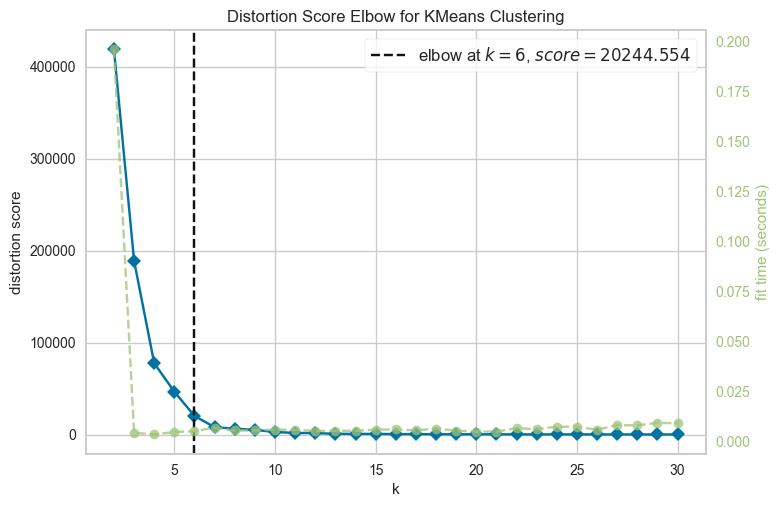

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Step 1: Use the Elbow Method with KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)  # Try different k values (up to 30)
Elbow_M.fit(features)  # Fit the PCA-transformed data to the Elbow Visualizer
Elbow_M.show()  # Show the plot to determine the optimal number of clusters

In [24]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Set n_clusters to the number of clusters you want
data['Cluster'] = kmeans.fit_predict(features)

# Check the cluster distribution
data['Cluster'].value_counts()

Cluster
2    35
0     5
1     2
5     2
4     1
3     1
Name: count, dtype: int64

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

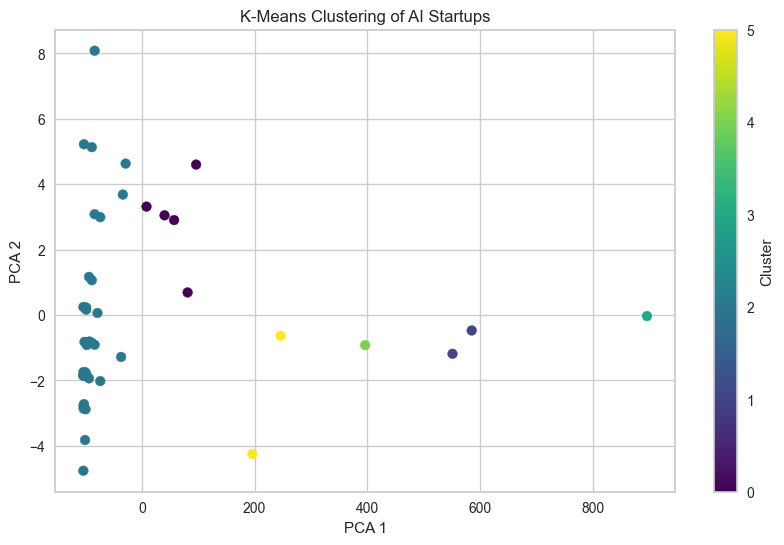

In [30]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Add PCA results to the DataFrame for visualization
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of AI Startups')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [31]:
# Analyze the most common failure reasons and takeaways for each cluster
for cluster in range(data['Cluster'].nunique()):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    # Print top failure reasons in this cluster
    failure_reasons = cluster_data['Why They Failed'].value_counts().head(5)
    takeaways = cluster_data['Takeaway'].value_counts().head(5)
    print("Most common failure reasons:")
    print(failure_reasons)
    print("\nMost common takeaways:")
    print(takeaways)



Cluster 0:
Most common failure reasons:
Why They Failed
lost square mismanagement      1
lost nerdwallet slow growth    1
lost coupa sold                1
lost bank high default         1
lost upstart regs              1
Name: count, dtype: int64

Most common takeaways:
Takeaway
payment need execution     1
planning need traction     1
finance need edge          1
lending need stability     1
lending need compliance    1
Name: count, dtype: int64

Cluster 1:
Most common failure reasons:
Why They Failed
lost lendingclub high default    1
lost paypal high cost            1
Name: count, dtype: int64

Most common takeaways:
Takeaway
lending need risk balance    1
transfer need edge           1
Name: count, dtype: int64

Cluster 2:
Most common failure reasons:
Why They Failed
lost stripe sold                2
lost paypal low adoption        1
lost mint sold tradeking        1
lost mintacorns sold goldman    1
lost opensea nft crash          1
Name: count, dtype: int64

Most common takeaway

In [32]:
# Analyzing the most frequent failure reasons per cluster
cluster_analysis = data.groupby('Cluster')['Why They Failed'].apply(lambda x: x.value_counts().idxmax())
print(cluster_analysis)


Cluster
0               lost square mismanagement
1           lost lendingclub high default
2                        lost stripe sold
3                   lost bank trust issue
4              lost coinbase market shift
5    regulatory fine opploans competition
Name: Why They Failed, dtype: object


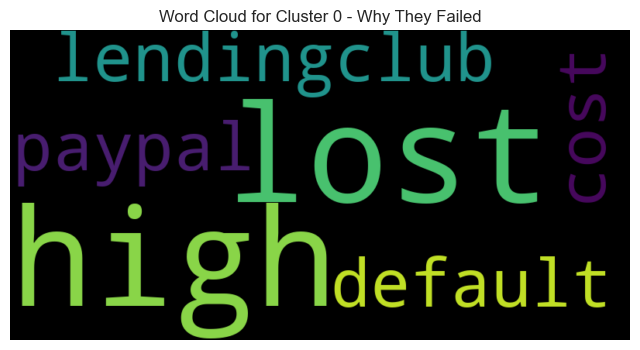

In [34]:
from wordcloud import WordCloud

# Generate word cloud for "Why They Failed" in cluster 0
text_failed_cluster_0 = " ".join(data[data['Cluster'] == 1]['Why They Failed'])
wordcloud_failed = WordCloud(width=800, height=400).generate(text_failed_cluster_0)

# Plot the word cloud for cluster 0
plt.imshow(wordcloud_failed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0 - Why They Failed')
plt.show()


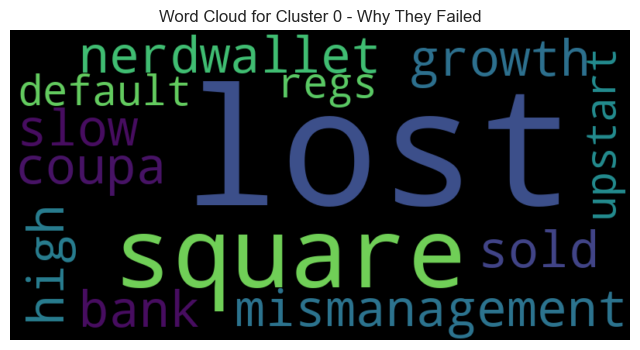

In [33]:
from wordcloud import WordCloud

# Generate word cloud for "Why They Failed" in cluster 0
text_failed_cluster_0 = " ".join(data[data['Cluster'] == 0]['Why They Failed'])
wordcloud_failed = WordCloud(width=800, height=400).generate(text_failed_cluster_0)

# Plot the word cloud for cluster 0
plt.imshow(wordcloud_failed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0 - Why They Failed')
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Re-combine the scaled numerical features with the text features
features_scaled = pd.concat([text_features, pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)], axis=1)

# Apply KMeans again on the scaled features
kmeans_scaled = KMeans(n_clusters=6, random_state=42)
data['Cluster_Scaled'] = kmeans_scaled.fit_predict(features_scaled)

# Check the new cluster distribution
data['Cluster_Scaled'].value_counts()


Cluster_Scaled
1    24
2    11
4     3
0     3
3     3
5     2
Name: count, dtype: int64

Elbow Method to determine the number of clusters to be formed:


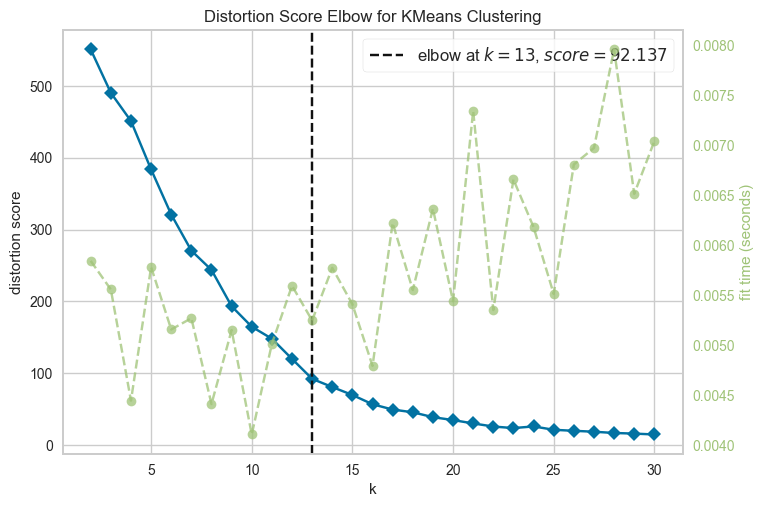

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Step 1: Use the Elbow Method with KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)  # Try different k values (up to 30)
Elbow_M.fit(features_scaled)  # Fit the PCA-transformed data to the Elbow Visualizer
Elbow_M.show()  # Show the plot to determine the optimal number of clusters

In [43]:
# Apply KMeans again on the scaled features
kmeans_scaled = KMeans(n_clusters=13, random_state=42)
data['Cluster_Scaled'] = kmeans_scaled.fit_predict(features_scaled)

# Check the new cluster distribution
data['Cluster_Scaled'].value_counts()

Cluster_Scaled
1     12
3      7
2      6
11     5
8      3
9      3
7      2
10     2
0      2
4      1
6      1
5      1
12     1
Name: count, dtype: int64

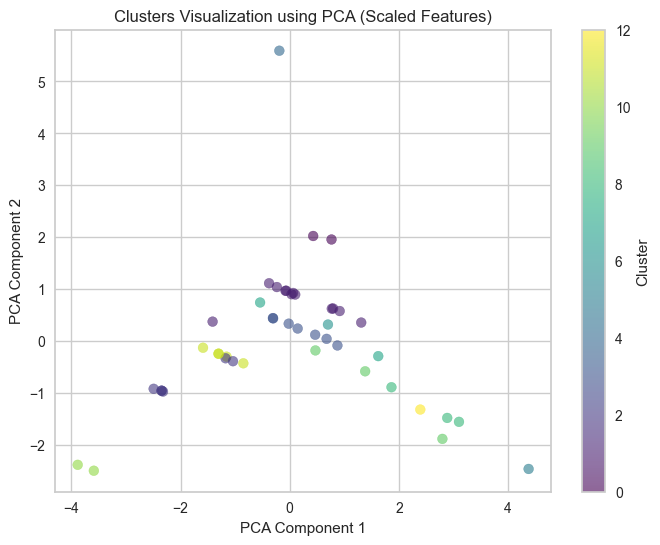

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the features to 2 components for visualization
pca = PCA(n_components=2)
pca_components_scaled = pca.fit_transform(features_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components_scaled[:, 0], pca_components_scaled[:, 1], c=data['Cluster_Scaled'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters Visualization using PCA (Scaled Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


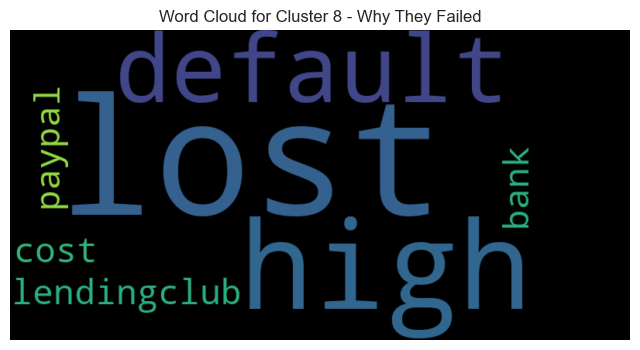

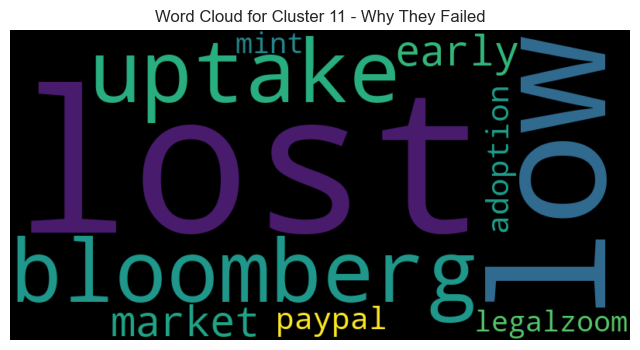

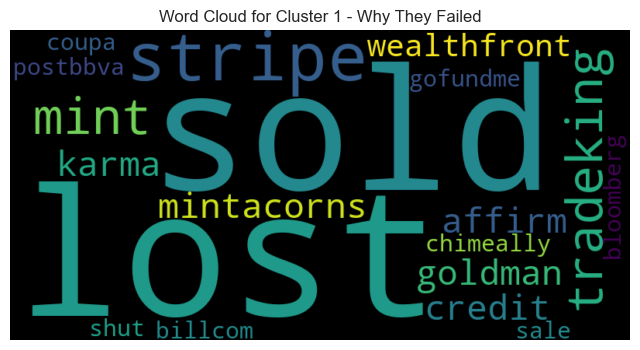

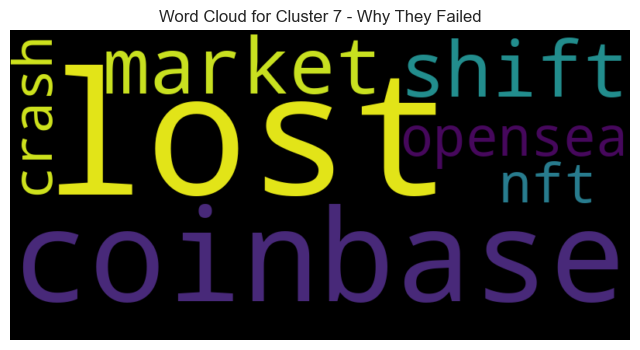

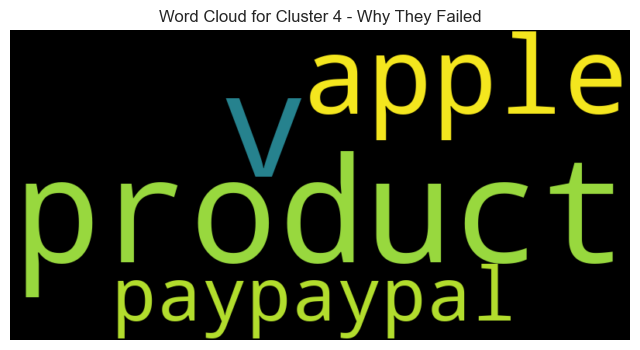

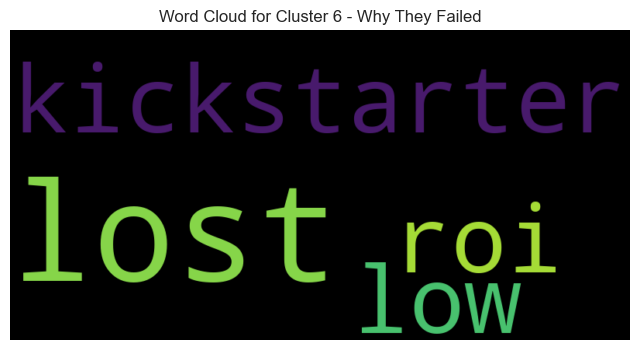

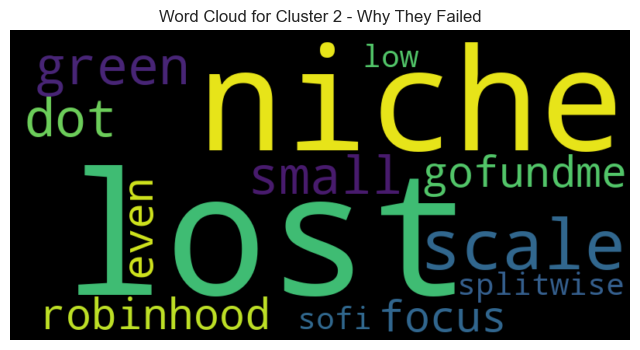

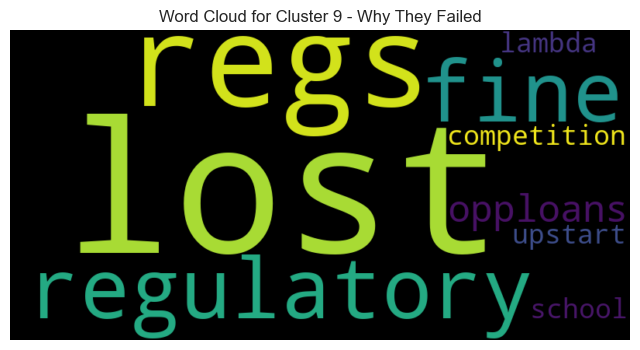

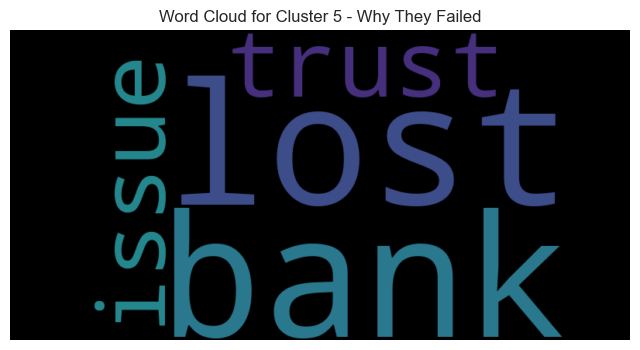

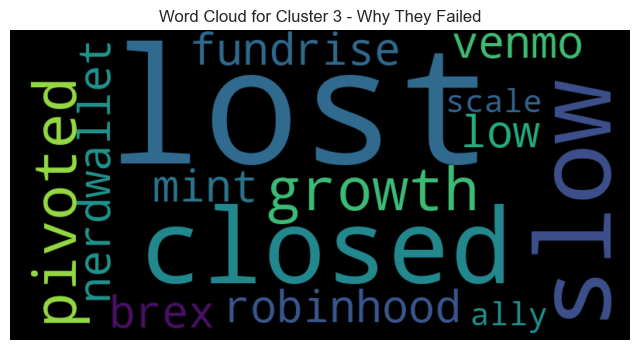

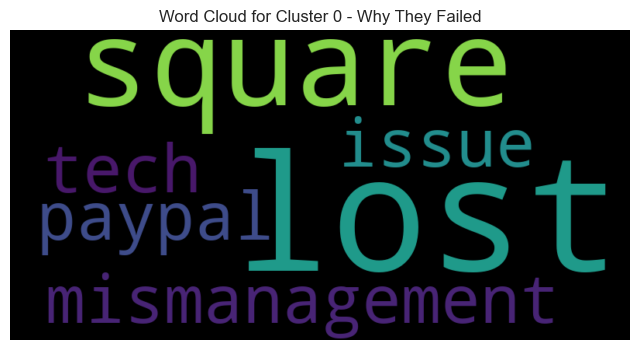

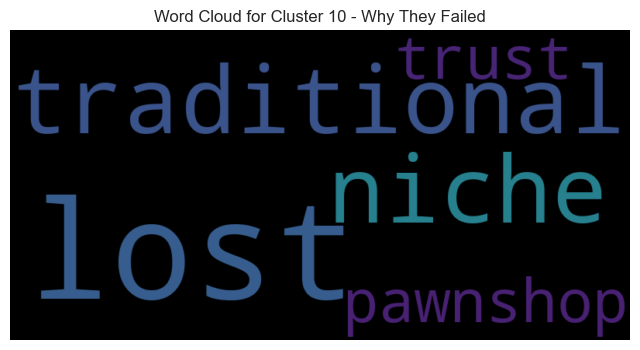

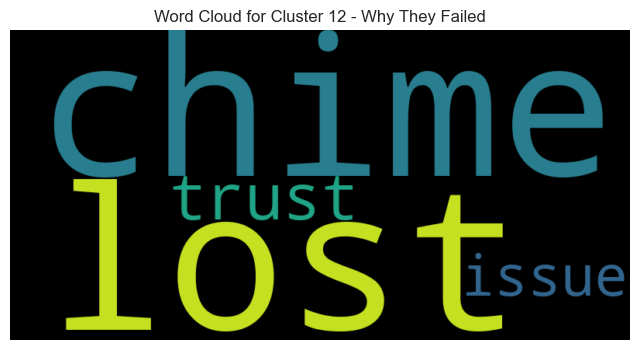

In [46]:
from wordcloud import WordCloud

# Loop through each cluster and generate a word cloud for the "Why They Failed" column
for cluster_num in data['Cluster_Scaled'].unique():
    cluster_text = " ".join(data[data['Cluster_Scaled'] == cluster_num]['Why They Failed'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(cluster_text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num} - Why They Failed')
    plt.show()


C:\Users\Phong\AppData\Local\Temp\ipykernel_13500\3203148080.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


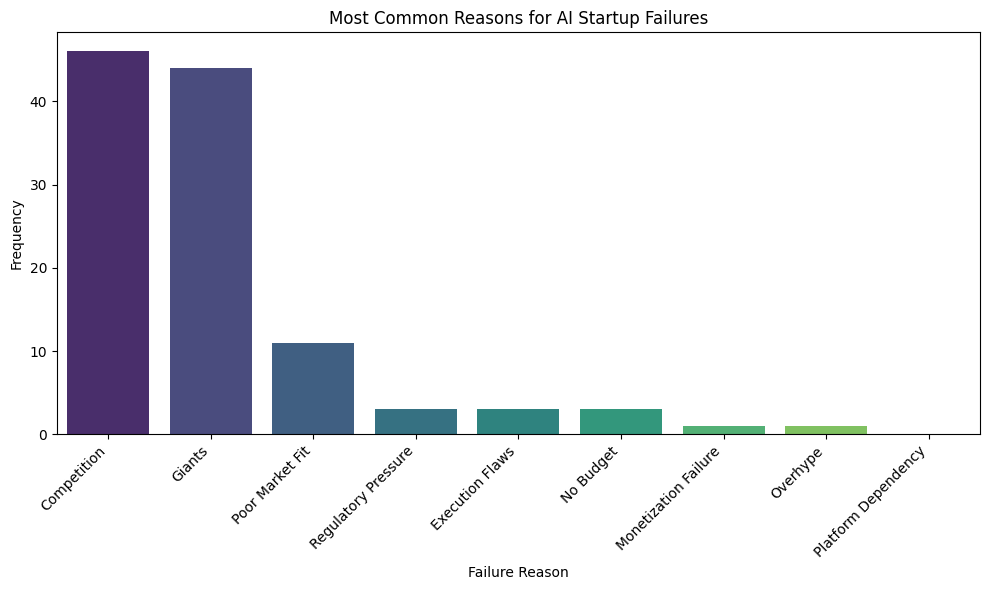

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of failure-related columns from the dataset
failure_columns = [
    'Competition', 'Poor Market Fit', 'Monetization Failure', 
    'Execution Flaws', 'Platform Dependency', 'Regulatory Pressure', 
    'Overhype', 'Giants', 'No Budget'
]

# Sum the number of 1s (indicating failure) for each failure reason
failure_counts = data[failure_columns].sum()

# Sort the reasons by their frequency in descending order
failure_counts = failure_counts.sort_values(ascending=False)

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Failure Reason')
plt.ylabel('Frequency')
plt.title('Most Common Reasons for AI Startup Failures')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='Years of Operation', ylabel='How Much They Raised (Millions)'>

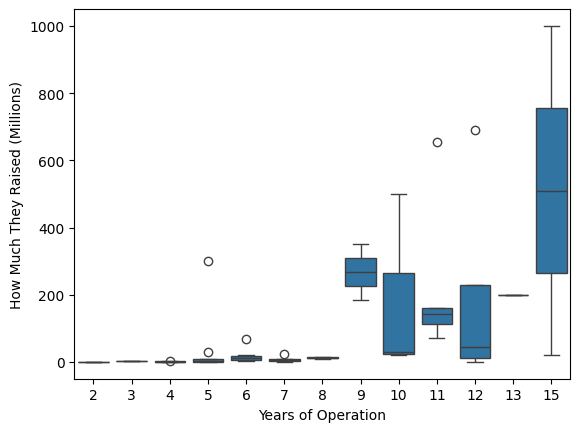

In [ ]:
sns.boxplot(x='Years of Operation', y='How Much They Raised (Millions)', data=data)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib as mpl
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [41]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne='Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

data_produits = pd.DataFrame(data['Why They Failed'].unique()).rename(columns = {0:'Description'})

keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(data_produits, colonne='Description')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Phong/nltk_data'
    - 'c:\\Users\\Phong\\anaconda3\\envs\\DEFAULTPY\\nltk_data'
    - 'c:\\Users\\Phong\\anaconda3\\envs\\DEFAULTPY\\share\\nltk_data'
    - 'c:\\Users\\Phong\\anaconda3\\envs\\DEFAULTPY\\lib\\nltk_data'
    - 'C:\\Users\\Phong\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
data_produits

,Description
0,Lost to LendingClub and high defaults
1,Lost to PayPal and low adoption
2,Lost to Mint and sold to TradeKing
3,Lost to Coinbase and market shifts
4,Lost to Mint/Acorns and sold to Goldman
5,No product vs Apple Pay/PayPal
6,Lost to OpenSea and NFT crash
7,Lost to Kickstarter and low ROI
8,Lost to Green Dot and small scale
9,Lost to GoFundMe and niche focus


In [ ]:
data_produits = pd.DataFrame(data['Why They Failed'].unique()).rename(columns = {0:'Description'})

In [ ]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(data_produits)

KeyError: 'Why They Failed'